# Initialize and Setup

In [10]:
import os
import time

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import ro_ml_util as utl

save_directory = "figures/NeuralNetwork"
model_name = "Neural Network"

folders = ["figures/NeuralNetwork/Complexity_Analysis",
           "figures/NeuralNetwork/Grid_Search_Results",
           "figures/NeuralNetwork/Learning_Curves",
           "figures/NeuralNetwork/Confusion_Matrix",
           "figures/NeuralNetwork/Metrics"]

directories = {
    "Save Directory": "figures/NeuralNetwork",
    "Initial Complexity Analysis": "figures/NeuralNetwork/Initial Complexity Analysis",
    "Grid Search Results": "figures/NeuralNetwork/Grid Search Results",
    "Learning Curves": "figures/NeuralNetwork/Learning Curves",
    "Final Complexity Analysis": "figures/NeuralNetwork/Final Complexity Analysis"
}

Random_Number = 42
n_jobs = 6
TESTING = False
cv = 5
np.random.seed(42)
get_ipython().system('pip install pyarrow')

In [2]:
gathered_data_fashion = utl.setup(["Fashion-MNIST"])

fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"],
    normalize=True)

dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [3]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")

figures/NeuralNetwork folder already exists.
figures/NeuralNetwork/Complexity_Analysis folder already exists.
figures/NeuralNetwork/Grid_Search_Results folder already exists.
figures/NeuralNetwork/Learning_Curves folder already exists.
figures/NeuralNetwork/Confusion_Matrix folder already exists.
figures/NeuralNetwork/Metrics folder already exists.


In [4]:
mnist_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
fashion_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag",
                 "Ankle boot"]

In [5]:
# Hidden Layer Sizes (100), suggests there is an input layer connected to a hidden layer with 100 nodes. (100,100) suggests
#    that there is an input layer connected to a hidden layer with 100 nodes, which is then connected to another hidden
#    layer with 100 nodes

# Solver ~ 'adam': stochastic gradient based optimizer (works well on larger datasets)
#          'lbfgs': works well on smaller datasets
#          'sgd': stochastic gradient descent

# Warmstart allows to train multiple times on same dataset using results from previous training session


if TESTING:
    val = 600
    pred_val = 600
    train_sizes = np.linspace(0.05, 1.0, 5)
else:
    val = 10000
    pred_val = 10000
    train_sizes = np.linspace(0.05, 1.0, 20)

# Final Learning Curve

Working on learning curve: 1
[learning_curve] Training set sizes: [ 400  800 1200 1600 2000 2400 2800 3199 3599 3999 4399 4800 5200 5600
 6000 6399 6800 7200 7600 8000]


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of 100 | elapsed:    7.5s remaining:  6.2min
[Parallel(n_jobs=6)]: Done  13 out of 100 | elapsed:   49.1s remaining:  5.5min
[Parallel(n_jobs=6)]: Done  24 out of 100 | elapsed:  1.3min remaining:  4.3min
[Parallel(n_jobs=6)]: Done  35 out of 100 | elapsed:  2.1min remaining:  3.8min
[Parallel(n_jobs=6)]: Done  46 out of 100 | elapsed:  2.6min remaining:  3.0min
[Parallel(n_jobs=6)]: Done  57 out of 100 | elapsed:  3.4min remaining:  2.5min
[Parallel(n_jobs=6)]: Done  68 out of 100 | elapsed:  3.9min remaining:  1.8min
[Parallel(n_jobs=6)]: Done  79 out of 100 | elapsed:  4.7min remaining:  1.2min
[Parallel(n_jobs=6)]: Done  90 out of 100 | elapsed:  5.3min remaining:   34.9s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  6.0min finished


Starting Confusion Matrix
C:\Users\joshu\OneDrive - Georgia Institute of Technology\Georgia-Tech\CS 7641 - Machine Learning\Assignments\Randomized Optimization\NeuralNetwork/Confusion_Matrix folder already exists.
Run Time: 387.93200516700745s


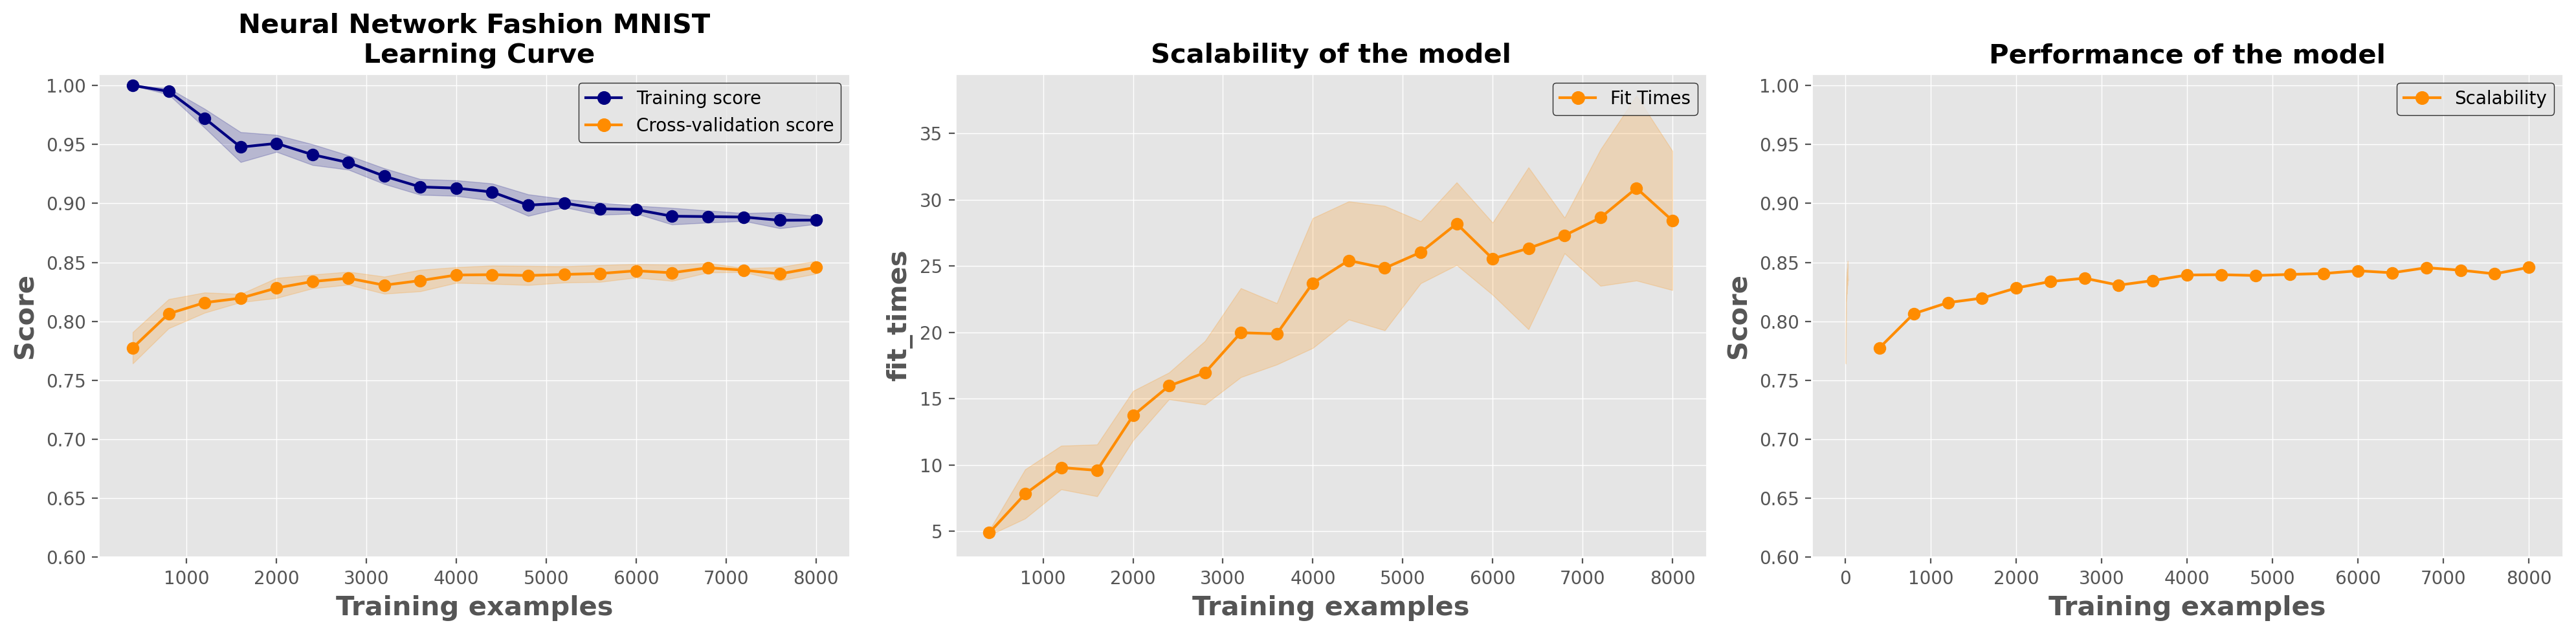

In [6]:

start_time = time.time()
results = []
for i in range(1,2,1):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "nn_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
        optimized_nn = MLPClassifier(hidden_layer_sizes=(20, ) , solver='adam', max_iter=400, alpha=1.0)
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        optimized_nn = MLPClassifier(hidden_layer_sizes=(40, ) , solver='adam', max_iter=400, alpha=1.0)
    
    res['nn_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_nn, title=title,test_X=fashion_test_X,
                                                                   test_y=fashion_test_y,
                                                                   train_X=temp_train_X, train_y=temp_train_y, cv=cv,
                                                                   f_name=f_name, train_sizes=train_sizes,
                                                                   folder='NeuralNetwork',
                                                                   save_individual=True, TESTING=True, backend='loky',
                                                                   n_jobs=n_jobs,
                                                                   extra_name="Final_Learning_Curve", confusion=True, 
                                                                   confusion_name="Fashion MNIST")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


# Final Confusion Matrix on Test set "(O_o)"

In [24]:
optimized_nn = MLPClassifier(hidden_layer_sizes=(40, ) , solver='adam', max_iter=400, alpha=1.0, warm_start=True)
cv=100
idx = np.random.choice(fashion_train_X.shape[0], size=(cv, 20000), replace=True)

In [25]:
for i in range(cv):
    print(f"CV {i} Starting")
    optimized_nn.fit(fashion_train_X.iloc[idx[i]], fashion_train_y.iloc[idx[i]])
    print(f"CV {i} Finished")

CV 0 Starting
CV 0 Finished
CV 1 Starting
CV 1 Finished
CV 2 Starting
CV 2 Finished
CV 3 Starting
CV 3 Finished
CV 4 Starting
CV 4 Finished
CV 5 Starting
CV 5 Finished
CV 6 Starting
CV 6 Finished
CV 7 Starting
CV 7 Finished
CV 8 Starting
CV 8 Finished
CV 9 Starting
CV 9 Finished
CV 10 Starting
CV 10 Finished
CV 11 Starting
CV 11 Finished
CV 12 Starting
CV 12 Finished
CV 13 Starting
CV 13 Finished
CV 14 Starting
CV 14 Finished
CV 15 Starting
CV 15 Finished
CV 16 Starting
CV 16 Finished
CV 17 Starting
CV 17 Finished
CV 18 Starting
CV 18 Finished
CV 19 Starting
CV 19 Finished
CV 20 Starting
CV 20 Finished
CV 21 Starting
CV 21 Finished
CV 22 Starting
CV 22 Finished
CV 23 Starting
CV 23 Finished
CV 24 Starting
CV 24 Finished
CV 25 Starting
CV 25 Finished
CV 26 Starting
CV 26 Finished
CV 27 Starting
CV 27 Finished
CV 28 Starting
CV 28 Finished
CV 29 Starting
CV 29 Finished
CV 30 Starting
CV 30 Finished
CV 31 Starting
CV 31 Finished
CV 32 Starting
CV 32 Finished
CV 33 Starting
CV 33 Finished


In [26]:
y_pred = optimized_nn.predict(fashion_test_X)
print(y_pred.shape)

(7000,)


In [31]:
test_cv = 100
results = np.zeros(shape=(test_cv))
test_idx = np.random.choice(fashion_test_X.shape[0], size=(test_cv, 2000), replace=True)
for i in range(test_cv):
    temp_y_pred = optimized_nn.predict(fashion_test_X.iloc[test_idx[i]]) 
    temp_acc = accuracy_score(y_true=fashion_test_y.iloc[test_idx[i]], y_pred=temp_y_pred)
    results[i] = temp_acc
    

In [32]:
print(results)
print(results.mean())

[0.868  0.8515 0.853  0.857  0.859  0.86   0.8345 0.8545 0.8575 0.8645
 0.852  0.8475 0.866  0.85   0.8515 0.8575 0.843  0.857  0.8465 0.859
 0.8545 0.852  0.8605 0.851  0.8575 0.8545 0.8675 0.868  0.857  0.851
 0.856  0.86   0.8575 0.857  0.8485 0.863  0.852  0.871  0.846  0.8645
 0.86   0.8585 0.8545 0.858  0.861  0.8575 0.868  0.86   0.864  0.8615
 0.848  0.8615 0.853  0.846  0.8525 0.857  0.854  0.8595 0.8705 0.8575
 0.864  0.8645 0.866  0.8575 0.8535 0.8485 0.8585 0.8535 0.844  0.865
 0.8635 0.855  0.858  0.8775 0.8515 0.861  0.8585 0.8745 0.862  0.854
 0.8445 0.858  0.855  0.86   0.8615 0.863  0.8555 0.873  0.847  0.871
 0.856  0.867  0.859  0.8555 0.8395 0.8565 0.852  0.8455 0.8625 0.861 ]
0.8573450000000001


In [27]:
a = accuracy_score(y_true=fashion_test_y, y_pred=y_pred)

In [28]:
print(a)

0.8577142857142858
